<a href="https://colab.research.google.com/github/alinecrb/machine-learning/blob/main/N%C3%ADveis_de_Cinza_e_Binariza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image

# Carregando a imagem que você enviou (suponha que o nome seja 'imagem_original.png')
imagem = Image.open('Lenna.png')
imagem = imagem.convert('RGB')  # Garante que está em RGB

# Salvando no formato PPM ASCII (P3)
imagem.save('Lenna.ppm', format='PPM')

In [9]:
def carregar_ppm(caminho):
    with open(caminho, 'r', encoding='latin-1') as f:
        linhas = f.readlines()

    # Ignorando comentários e pegando cabeçalho
    linhas = [linha for linha in linhas if not linha.startswith('#')]
    assert linhas[0].strip() == 'P3'  # Formato ASCII PPM

    largura, altura = map(int, linhas[1].split())
    max_valor = int(linhas[2])
    pixels = list(map(int, ' '.join(linhas[3:]).split()))

    imagem = []
    i = 0
    for _ in range(altura):
        linha = []
        for _ in range(largura):
            r, g, b = pixels[i], pixels[i+1], pixels[i+2]
            linha.append((r, g, b))
            i += 3
        imagem.append(linha)
    return imagem, largura, altura, max_valor

def salvar_ppm(caminho, imagem, largura, altura, max_valor=255):
    with open(caminho, 'w') as f:
        f.write(f'P3\n{largura} {altura}\n{max_valor}\n')
        for linha in imagem:
            for r, g, b in linha:
                f.write(f'{r} {g} {b} ')
            f.write('\n')

def converter_para_cinza(imagem):
    imagem_cinza = []
    for linha in imagem:
        linha_cinza = []
        for r, g, b in linha:
            # Média ponderada (percepção visual): luminosidade
            cinza = int(0.299*r + 0.587*g + 0.114*b)
            linha_cinza.append(cinza)
        imagem_cinza.append(linha_cinza)
    return imagem_cinza

def binarizar(imagem_cinza, limiar=127):
    binaria = []
    for linha in imagem_cinza:
        linha_bin = [255 if px > limiar else 0 for px in linha]
        binaria.append(linha_bin)
    return binaria

# 🧪 Exemplo de uso
imagem, largura, altura, max_valor = carregar_ppm('Lenna.ppm')
imagem_cinza = converter_para_cinza(imagem)
imagem_binaria = binarizar(imagem_cinza)

salvar_ppm('saida_cinza.ppm', imagem_cinza, largura, altura)
salvar_ppm('saida_binaria.ppm', imagem_binaria, largura, altura)

AssertionError: 

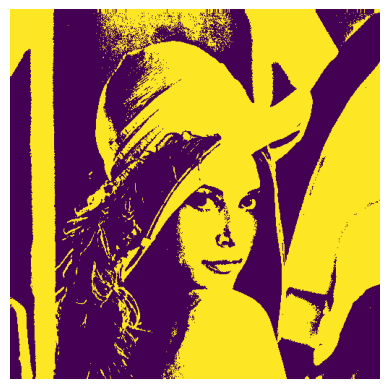

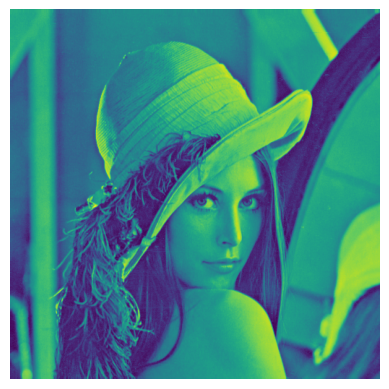

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('saida_cinza.ppm')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('saida_binaria.ppm')
plt.imshow(img)
plt.axis('off')
plt.show()